# Approach

**The dataset that will be used consists of 853 images that contain examples of people wearing masks both correctly and incorrectly and of people not wearing masks at all. In addition, every image is accompanied by the location of every face that can be detected in it, as well as the respective annotation. Given the nature of the dataset, it was decided to try two different approaches. The first one is more challenging, as the goal is not to use the already provided face locations, but to perform face detection from scratch. If this approach is not able to produce satisfying results, the faces will be extracted by using their predifined locations and a Neural Network will be trained in order to be able to classify the images. For the first approach, different techniques were tested.**

In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle
import numpy as np
import cv2
from cv2 import CascadeClassifier, rectangle
from mtcnn.mtcnn import MTCNN


# Haar Cascades

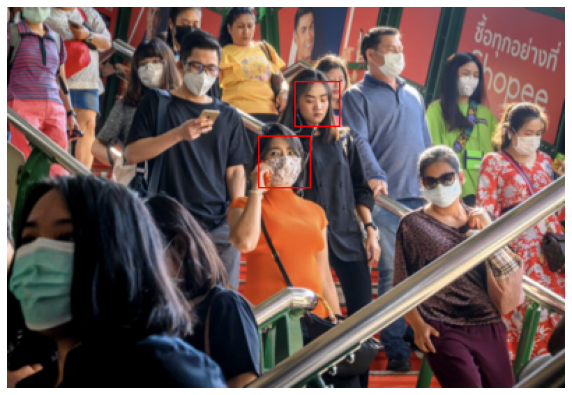

In [40]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt2.xml')

inp_img = cv2.imread('C:/Users/User/Desktop/AIVP/images/maksssksksss61.png')
gray = cv2.cvtColor(inp_img, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray,1.05, 5, minSize=(30,30))

out_img = cv2.cvtColor(inp_img, cv2.COLOR_RGB2BGR) 

for (x,y,w,h) in faces:
    cv2.rectangle(out_img,(x,y),(x+w,y+h),(255,0,0),1)

plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(out_img)

# MTCNN

In [3]:
def plot_result(image, faces):
    
    photo = plt.imread(image)
    plt.imshow(photo)
    ax = plt.gca()
    
    for face in faces:
        
        x, y, w, h = face['box']
        rect = Rectangle((x, y), w, h, fill=False, color='red')
        
        ax.add_patch(rect)
        
        for key, value in face['keypoints'].items():
            
            dot = Circle(value, radius=2, color='red')
            ax.add_patch(dot)
            
    plt.axis("off")
    plt.show()

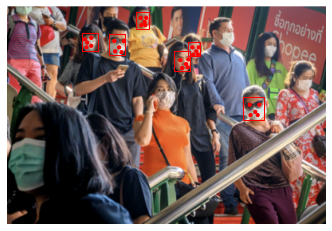

In [4]:
image = 'C:/Users/User/Desktop/AIVP/images/maksssksksss61.png'
pixels = cv2.imread(image)

detector = MTCNN()
faces = detector.detect_faces(pixels)

plot_result(image, faces)

**As can be seen, in both cases the algorithms fail to detect many of the faces.**

# Amazon Web Services: Rekognition



In [41]:
import csv
import boto3

with open ('C:/Users/User/Desktop/AIPROJECT/credentials.csv','r') as input:
    next(input)
    reader=csv.reader(input)
    for line in reader:
        acces_key_id=line[2]               # Accesing the respective credentials values in the .csv file to perform the API call
        secret_access_key=line[3]

photo= 'C:/Users/User/Desktop/AIVP/images/maksssksksss61.png'   

client=boto3.client('rekognition', aws_access_key_id=acces_key_id, aws_secret_access_key=secret_access_key, region_name='us-west-2')

with open(photo, 'rb') as source_image:
    source_bytes= source_image.read()
    
response=client.detect_faces(Image={'Bytes': source_bytes})

print(response)

{'FaceDetails': [{'BoundingBox': {'Width': 0.14300458133220673, 'Height': 0.3616110682487488, 'Left': 0.01289757713675499, 'Top': 0.4834657311439514}, 'Landmarks': [{'Type': 'eyeLeft', 'X': 0.03911779820919037, 'Y': 0.6124355792999268}, {'Type': 'eyeRight', 'X': 0.10222701728343964, 'Y': 0.6068318486213684}, {'Type': 'mouthLeft', 'X': 0.03536909073591232, 'Y': 0.7319435477256775}, {'Type': 'mouthRight', 'X': 0.08745533227920532, 'Y': 0.7272282242774963}, {'Type': 'nose', 'X': 0.05834583938121796, 'Y': 0.6555713415145874}], 'Pose': {'Roll': -7.9999542236328125, 'Yaw': -28.546070098876953, 'Pitch': 21.04107093811035}, 'Quality': {'Brightness': 25.576568603515625, 'Sharpness': 32.20803451538086}, 'Confidence': 99.96952056884766}, {'BoundingBox': {'Width': 0.06453819572925568, 'Height': 0.13658496737480164, 'Left': 0.4594588875770569, 'Top': 0.3355257511138916}, 'Landmarks': [{'Type': 'eyeLeft', 'X': 0.47895312309265137, 'Y': 0.3862988352775574}, {'Type': 'eyeRight', 'X': 0.510710239410400

**The response is a dictionary that contains information about the location of the identifed faces, as well as information about facial features. By browsing through the response, the information that interest the most e.g. the location of the faces can be utilized.**

In [42]:
lista=response['FaceDetails']

img = cv2.imread('C:/Users/User/Desktop/AIVP/images/maksssksksss61.png')
h, w, c = img.shape                                                      

boxes=[]                                                                    # A list where the bounding boxes will be stored
num_faces=len(lista)                                                        # To keep track of the number of faces located

for i in range(len(lista)):
        
    xmin =int(w*(lista[i]['BoundingBox']['Width']))                         # The coordinates for the location of the faces are                                                               
    ymin =int(h*(lista[i]['BoundingBox']['Height']))                        # returned as a ratio of the image shapes. So, in      
    xmax =int(w*(lista[i]['BoundingBox']['Left']))                          # order to get the actual coordinates, they will
    ymax =int(h*(lista[i]['BoundingBox']['Top']))                           # have to be rescaled
    boxes.append([xmin, ymin, xmax, ymax])
    
        

        
boxes = np.array(boxes)                                                      # Convertion to numpy array

In [43]:
print(boxes)
print(num_faces)

[[ 57  98   5 131]
 [ 25  37 183  91]
 [ 24  34 126  28]
 [ 25  32 297 109]
 [ 21  31 208  52]
 [ 20  28 264  18]
 [ 19  25 364  79]
 [ 18  23  93  32]
 [ 18  23 120   1]
 [ 15  24 321  39]
 [ 13  27 207   6]
 [ 14  23 227  43]
 [ 15  22 161   5]]
13


**As can be seen, in this image 13 faces were located and their locations have been stored in the list 'boxes'.**

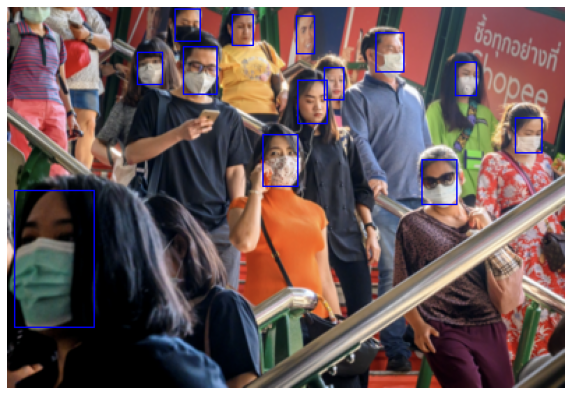

In [44]:
inp_img = cv2.imread('C:/Users/User/Desktop/AIVP/images/maksssksksss61.png')
out_img = cv2.cvtColor(inp_img, cv2.COLOR_RGB2BGR) 

for (x,y,w,h) in boxes:
    cv2.rectangle(out_img,(w,h),(w+x,h+y),(0,0,255),1)
plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(out_img)

**Amazon Rekognition is able to locate all the faces, masked and unmasked. So the next step is to extract the faces, store them in a new list and provide the respective annotation.**

In [45]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

faces_final = []

img = cv2.imread('C:/Users/User/Desktop/AIVP/images/maksssksksss61.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)                                         
    
    
for i in range(num_faces):                                                      # For every face that is present in an image                                           
                                                                                                  
    face_coords = boxes[i]
        
    fatses = img[face_coords[3]:face_coords[3]+face_coords[1], face_coords[2]:face_coords[2]+face_coords[1]]
    fatses = cv2.resize(fatses, (224, 224))
    #fatses = preprocess_input(fatses)                                              
                                                                                                                                                                   #MobileNetV2 was trained o
    faces_final.append(fatses)

faces_final = np.array(faces_final)  

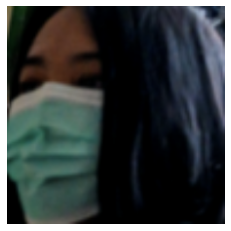

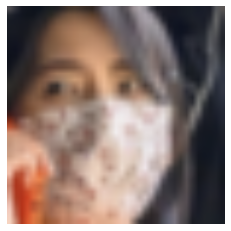

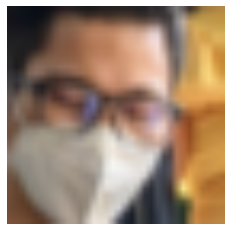

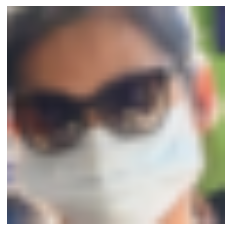

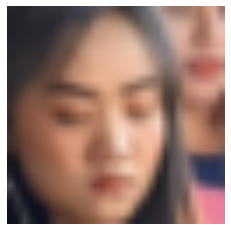

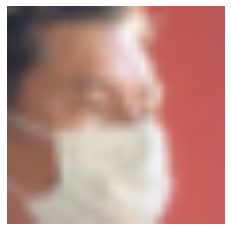

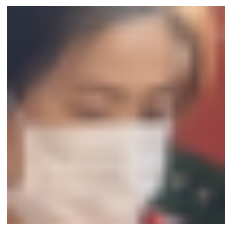

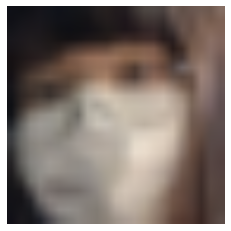

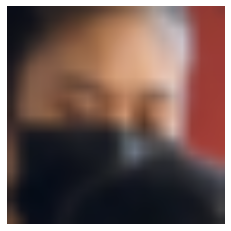

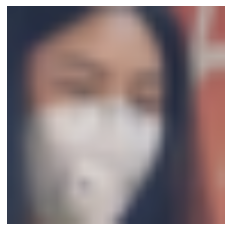

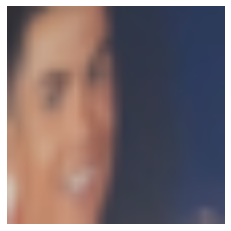

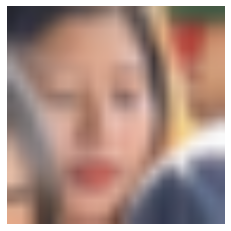

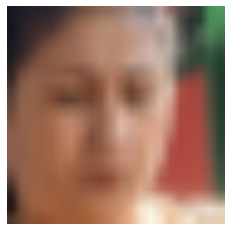

In [46]:
for i in range(num_faces):
    
    plt.subplot()    
    plt.axis('off')
    plt.imshow(faces_final[i])

    plt.show()

**In order to classify them to the following classes: "no_mask", "with_mask" and "mask_worn_improperly" the strategy is to look for facial features. More precisely, if both the nose and the mouth can be detected, it will be classified as "no_mask". If only the nose is detected, then it will be classified as "mask_worn_improperly" and if neither the nose, nor the mouth can be located, then classify it as "with_mask".**

**In order to detect the facial features, dlib was used. Dlib is a library that identifies 68 points that correspond to the facial landmarks of the face. There are two options available, the first uses the Histogram of Oriented Gradients(HOG) to extract features and then uses SVMs to decide whether a face is present. However, it is good only as a "frontal" face detector and does not perform well at big angles. The second option is based on CNNs and can perform better in different angles.**

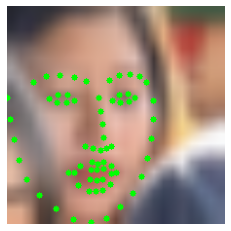

In [8]:
import dlib

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("C:/Users/User/Desktop/AIPROJECT/shape_predictor_68_face_landmarks.dat")

img = faces_final[11]
gray = cv2.cvtColor(src=img, code=cv2.COLOR_BGR2GRAY)                   # The images need be converted to grayscale


faces = detector(gray)
for face in faces:
    xmin= face.left() 
    ymin= face.top() 
    xmax= face.right() 
    ymax= face.bottom() 

    landmarks = predictor(image=gray, box=face)

    for n in range(0, 68):
        x = landmarks.part(n).x
        y = landmarks.part(n).y

        cv2.circle(img=img, center=(x, y), radius=3, color=(0, 255, 0), thickness=-1)
plt.axis("off")
plt.imshow(img)

**As the landmarks are ordered, for example the nose(indexes 28-31) can be located.**

**The next step is to apply this technique to the extracted faces and provide the respective annotations.**

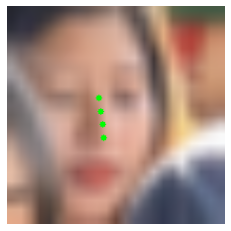

In [49]:
detect = dlib.get_frontal_face_detector()
predict = dlib.shape_predictor("C:/Users/User/Desktop/AIPROJECT/shape_predictor_68_face_landmarks.dat")

img = faces_final[11]
gray = cv2.cvtColor(src=img, code=cv2.COLOR_BGR2GRAY)

faces = detect(gray)

for face in faces:
    xmin = face.left() 
    ymin = face.top() 
    xmax = face.right() 
    ymax = face.bottom() 

    landmarks = predict(image=gray, box=face)

    for n in range(27, 31):                                  # To point out only the nose
        x = landmarks.part(n).x
        y = landmarks.part(n).y

        cv2.circle(img=img, center=(x, y), radius=3, color=(0, 255, 0), thickness=-1)
plt.axis("off")
plt.imshow(img)

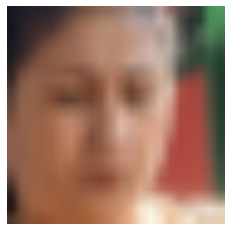

In [55]:
img = faces_final[12]
gray = cv2.cvtColor(src=img, code=cv2.COLOR_BGR2GRAY)

faces = detect(gray)

for face in faces:
    xmin = face.left() 
    ymin = face.top() 
    xmax = face.right() 
    ymax = face.bottom() 

    landmarks = predict(image=gray, box=face)

    for n in range(27, 31):                                  # To point out only the nose
        x = landmarks.part(n).x
        y = landmarks.part(n).y

        cv2.circle(img=img, center=(x, y), radius=3, color=(0, 255, 0), thickness=-1)
plt.axis("off")
plt.imshow(img)

**The model is not able to locate the faces and their facial features in many of the extracted faces, as a consequence, this approach was put to a halt.**

# Classification Task

**The results provided by the previous approach are not encouraging, so the preindicated face locations will be used in order to extract the faces from the images and train a Neural Network to be able to classify them correctly.**

### Loading the required libraries

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import os
import cv2
from bs4 import BeautifulSoup

import xmltodict 

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

from sklearn.model_selection import train_test_split


from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout,BatchNormalization
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report


import seaborn as sns
from sklearn.metrics import confusion_matrix

## Loading the Dataset

**Having downloaded the dataset, it is observed that the images and the annotations are separated into two folders. So two variables are created in order to store the data.**

In [3]:
img_path='C:/Users/User/Desktop/AIVP/images/'                    # Paths to the respective folders location
ann_path='C:/Users/User/Desktop/AIVP/annotations/'

In [4]:
images = os.listdir(img_path)                                    # By using the directories, the images and their annotations 
annotations = os.listdir(ann_path)                               # are stored into two separate lists. 

In [5]:
for i in range(10):
    print(images[i])

maksssksksss0.png
maksssksksss1.png
maksssksksss10.png
maksssksksss100.png
maksssksksss101.png
maksssksksss102.png
maksssksksss103.png
maksssksksss104.png
maksssksksss105.png
maksssksksss106.png


In [6]:
for i in range(10):
    print(annotations[i])

maksssksksss0.xml
maksssksksss1.xml
maksssksksss10.xml
maksssksksss100.xml
maksssksksss101.xml
maksssksksss102.xml
maksssksksss103.xml
maksssksksss104.xml
maksssksksss105.xml
maksssksksss106.xml


**Now the information that the .xml file contains will be investigated.**

In [7]:
with open(ann_path+annotations[15]) as file:
    print(xmltodict.parse(file.read()))

OrderedDict([('annotation', OrderedDict([('folder', 'images'), ('filename', 'maksssksksss111.png'), ('size', OrderedDict([('width', '400'), ('height', '268'), ('depth', '3')])), ('segmented', '0'), ('object', [OrderedDict([('name', 'with_mask'), ('pose', 'Unspecified'), ('truncated', '0'), ('occluded', '0'), ('difficult', '0'), ('bndbox', OrderedDict([('xmin', '17'), ('ymin', '182'), ('xmax', '35'), ('ymax', '202')]))]), OrderedDict([('name', 'with_mask'), ('pose', 'Unspecified'), ('truncated', '0'), ('occluded', '0'), ('difficult', '0'), ('bndbox', OrderedDict([('xmin', '17'), ('ymin', '101'), ('xmax', '25'), ('ymax', '116')]))]), OrderedDict([('name', 'with_mask'), ('pose', 'Unspecified'), ('truncated', '0'), ('occluded', '0'), ('difficult', '0'), ('bndbox', OrderedDict([('xmin', '48'), ('ymin', '98'), ('xmax', '61'), ('ymax', '113')]))]), OrderedDict([('name', 'without_mask'), ('pose', 'Unspecified'), ('truncated', '0'), ('occluded', '0'), ('difficult', '0'), ('bndbox', OrderedDict(

**As can be observed, the xml file contains the coordinates of the location of every face that appears in an image, along with the corresponding label ('with_mask', 'without_mask', 'mask_weared_incorrect').**

**Now the bounding boxes that are provided will be used, in order to extract the faces that are present in every image. The extracted faces and their corresponding classes will be stored again in two separate lists. The values 'with_mask', 'without_mask', 'mask_weared_incorrect' are changed to 2,0 and 1 respectively.** 

In [8]:
def detection_func(path_ann): 
    
    with open(path_ann) as file:
        
        soup = BeautifulSoup(file.read(), 'xml')
        objects = soup.find_all('object')

        num_faces = len(objects)                                        # This variable is used to count the number of faces 
                                                                        # that are detected
        boxes = []
        classes = []
        
        for obj in objects:
           
            if obj.find('name').text == "without_mask":                 # For every detected face, the respective annotation is
                classes.append(0)                                       # stored in the list 'classes'
            elif obj.find('name').text == "mask_weared_incorrect":
                classes.append(1)
            elif obj.find('name').text == "with_mask":
                classes.append(2)
            else:
                break
            
            xmin = int(obj.find('xmin').text)                            # The location of every face is stored in the list 
            ymin = int(obj.find('ymin').text)                            # 'boxes'
            xmax = int(obj.find('xmax').text)
            ymax = int(obj.find('ymax').text)
            boxes.append([xmin, ymin, xmax, ymax])
        

        boxes = np.array(boxes)                                           # Both lists are turned into numpy arrays
        classes = np.array(classes)
        
        faces = {}                                                        # A dictionary with keys "classes" and "boxes" to
        faces["classes"] = classes                                        # store the faces location along with the respective
        faces["boxes"] = boxes                                            # annotation

        return faces, num_faces

In [9]:
bboxes=[] 
num_faces=[]

for annotation in annotations:
    
    face_box, face = detection_func(ann_path+annotation)
    bboxes.append(face_box)
    num_faces.append(face)

In [10]:
print(bboxes[34])

{'classes': array([0, 0, 2]), 'boxes': array([[106,  69, 124,  89],
       [149,  30, 168,  53],
       [246,  40, 271,  69]])}


**So now we have a dictionary with the bounding box coordinates and the respective class for each face.**

## New dataset creation

**Now, having extracted the boundaries,the faces will be extracted from every image and stored to a new list. Similarly the respective classes will also be stored to another list. Also, the images will be resized to 224*224 pixels.**

In [11]:
faces_final = []
classes_final = []

for i, image_path in enumerate(images):
    img = cv2.imread(img_path+image_path, cv2.IMREAD_COLOR) 
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)                                        #For every image in the list 'images'
    
    
    for j in range(0, num_faces[i]):                                                  #For every face that is present in an                                            
                                                                                      #image               
        face_coords = bboxes[i]['boxes'][j]
        
        fatses = img[face_coords[1]:face_coords[3], face_coords[0]:face_coords[2]]
        fatses = cv2.resize(fatses, (224, 224))
        fatses = preprocess_input(fatses)                                             #The inputs pixel values are scaled 
                                                                                      #between -1 and 1
        
        faces_final.append(fatses)
        classes_final.append(bboxes[i]['classes'][j])


faces_final = np.array(faces_final, dtype='float32')                                  #Convert both lists to numpy arrays
classes_final = np.array(classes_final)

In [12]:
print(faces_final.shape, classes_final.shape)

(4072, 224, 224, 3) (4072,)


**It can now be observed that 4072 faces were extracted.**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


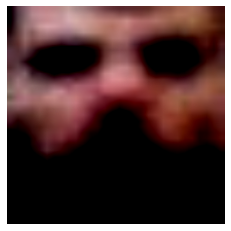

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


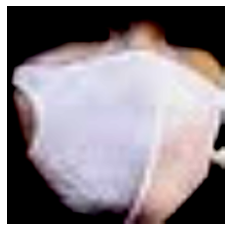

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


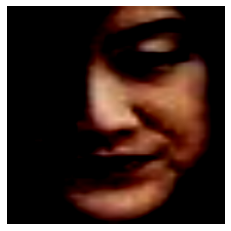

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


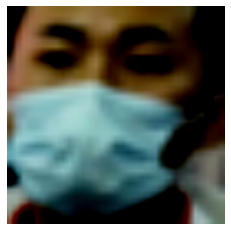

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


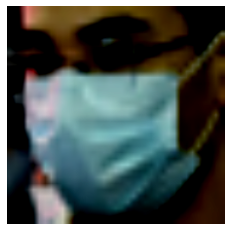

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


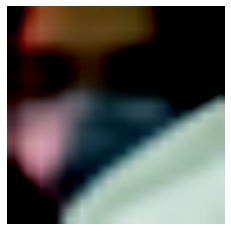

In [13]:
for i in range(6):
    
    plt.subplot()    
    plt.axis('off')
    plt.imshow(faces_final[i])

    plt.show()

**A new dataset has been created, that consists of the extracted faces and the respective class they belong to. This dataset will now be split into training and validation set in order to assess the performance of the model.**

## Image augmentation

**To enhance the results of training the model, image augmentation will be performed. The options that were decided are to rotate images by 30 degrees, adjust the zoom range by 20%, width and height shift by 10% and finally performing horizontal flips.**

In [14]:
gen = ImageDataGenerator(
    zoom_range=0.2,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode="nearest"
    )

**The labels will also be encoded.**

In [15]:
lb = LabelEncoder()
annotations = lb.fit_transform(classes_final)
annotations = to_categorical(annotations)
annotations

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

**An 80-20 split was performed to create a set to train the model and another set to evaluate it's performance.**

In [16]:
(trainX, testX, trainY, testY) = train_test_split(faces_final, annotations, test_size=0.2, stratify=annotations, random_state=42)

In [17]:
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(3257, 224, 224, 3)
(3257, 3)
(815, 224, 224, 3)
(815, 3)


**By splitting the data to 80% as a training set and 20% as a validation set, there are now 3257 images for training and 815 images for validating the performance. Since the dataset is relevantly small, it was decided to use MobileNetV2 as a base model, while using transfer learning by setting 'the weights' to 'imagenet'. Thus to use the pretrained weights that were trained on the imagenet dataset. After the basemodel is defined, what now need be done is to build on top of that, so we need to define what layers will be added.**

**In order to fine-tune the model, different tests will be performed. More precisely, there will be experiments with the number and type of layers that will be added, the number of layers of the pretrained model that will be unfrozen and trained with this new dataset. In all the cases, the final layer will be a Dense layer, activated by softmax, with 3 outputs as we have 3 classes.**

**The metrics that will be used to evaluate the performance are: precision, recall, f1-score, accuracy and a confusion matrix.**

**Since the dataset is imbalanced, weights will be assigned during training in order to alleviate the imbalance.**

### Pooling layer-Flatten-Dense-Dropout-Dense-Dropout

**This architecture is the first to be tested.**

In [18]:
lr = 1e-3        
epochs = 10      # For the first tests, the models will be trained for 10 epochs
batch = 32          

In [23]:
MNV2 = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

HM = MNV2.output
HM = AveragePooling2D(pool_size=(7, 7))(HM)                                                                   
HM = Flatten(name="flatten")(HM)                                                                              
HM = Dense(256, activation="relu")(HM)
HM = Dropout(0.2)(HM)
HM = Dense(128, activation="relu")(HM)
HM = Dropout(0.2)(HM)

HM = Dense(3, activation="softmax")(HM)

In [24]:
mymodel = Model(inputs=MNV2.input, outputs=HM)                #Merging the base and head models

for layer in MNV2.layers:                                     # Freezing all the layers of the base model
    layer.trainable = False

In [25]:
mymodel.compile(loss="categorical_crossentropy", optimizer=Adam(lr=lr,decay=lr/epochs),metrics=["accuracy"])

kopf = mymodel.fit(
    gen.flow(trainX, trainY, batch_size=batch),
    steps_per_epoch=len(trainX)//batch,
    validation_data=(testX, testY),
    validation_steps=len(testX)//batch,
    epochs=epochs,
    class_weight = {0:5 , 1:10, 2:1}) 

Epoch 1/10
101/101 [==============================] - 47s 468ms/step - loss: 1.5617 - accuracy: 0.7296 - val_loss: 0.6843 - val_accuracy: 0.6883
Epoch 2/10
101/101 [==============================] - 47s 464ms/step - loss: 1.1646 - accuracy: 0.7991 - val_loss: 0.5270 - val_accuracy: 0.7730
Epoch 3/10
101/101 [==============================] - 46s 455ms/step - loss: 1.1360 - accuracy: 0.8050 - val_loss: 0.4089 - val_accuracy: 0.8405
Epoch 4/10
101/101 [==============================] - 46s 459ms/step - loss: 0.9457 - accuracy: 0.8372 - val_loss: 0.3266 - val_accuracy: 0.8748
Epoch 5/10
101/101 [==============================] - 50s 492ms/step - loss: 0.9285 - accuracy: 0.8412 - val_loss: 0.2549 - val_accuracy: 0.9043
Epoch 6/10
101/101 [==============================] - 46s 457ms/step - loss: 0.8981 - accuracy: 0.8459 - val_loss: 0.4154 - val_accuracy: 0.8479
Epoch 7/10
101/101 [==============================] - 46s 457ms/step - loss: 0.8362 - accuracy: 0.8645 - val_loss: 0.2672 - val_ac

              precision    recall  f1-score   support

           0       0.57      0.99      0.72       143
           1       0.44      0.32      0.37        25
           2       0.99      0.84      0.91       647

    accuracy                           0.85       815
   macro avg       0.67      0.71      0.67       815
weighted avg       0.90      0.85      0.86       815



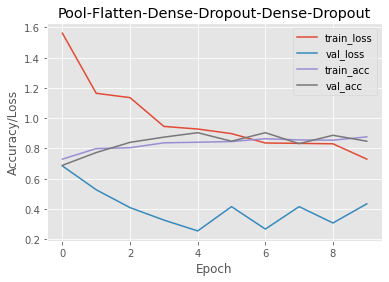

In [26]:
predictions = mymodel.predict(testX, batch_size=batch)
predictions = np.argmax(predictions, axis=1)

print(classification_report(testY.argmax(axis=1), predictions))


plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epochs), kopf.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), kopf.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, epochs), kopf.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epochs), kopf.history["val_accuracy"], label="val_acc")
plt.title("Pool-Flatten-Dense-Dropout-Dense-Dropout")
plt.xlabel("Epoch")
plt.ylabel("Accuracy/Loss")
plt.legend(loc="upper right")
plt.show()

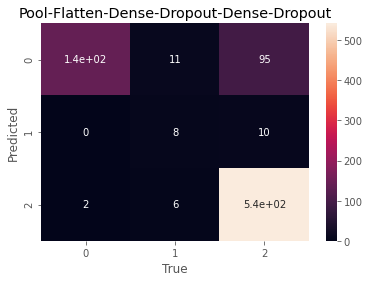

In [28]:
X_pred = np.argmax(mymodel.predict(testX), axis=1)
Y_pred = np.argmax(testY, axis=1)

sns.heatmap(confusion_matrix(X_pred, Y_pred), annot=True)
plt.ylabel('Predicted')
plt.xlabel('True')
plt.title('Pool-Flatten-Dense-Dropout-Dense-Dropout')
plt.show()

### Pooling layer-Flatten-Dense128-Dropout 0.5

In [29]:
base1 = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

Head1 = base1.output
Head1 = AveragePooling2D(pool_size=(7, 7))(Head1)                                                                   
Head1 = Flatten(name="flatten")(Head1)                                                                              
Head1 = Dense(128, activation="relu")(Head1)
Head1 = Dropout(0.5)(Head1)

Head1 = Dense(3, activation="softmax")(Head1)

In [30]:
model1 = Model(inputs=base1.input, outputs=Head1)               

for layer in base1.layers:                                       
    layer.trainable = False

In [31]:
model1.compile(loss="categorical_crossentropy", optimizer=Adam(lr=lr,decay=lr/epochs),metrics=["accuracy"])

mymodel1 = model1.fit(
    gen.flow(trainX, trainY, batch_size=batch),
    steps_per_epoch=len(trainX) // batch,
    validation_data=(testX, testY),
    validation_steps=len(testX) // batch,
    epochs=epochs,
    class_weight = {0:5 , 1:10, 2:1}) 

Epoch 1/10
101/101 [==============================] - 51s 502ms/step - loss: 1.6947 - accuracy: 0.7042 - val_loss: 0.6579 - val_accuracy: 0.7117
Epoch 2/10
101/101 [==============================] - 49s 485ms/step - loss: 1.2145 - accuracy: 0.7885 - val_loss: 0.3997 - val_accuracy: 0.8479
Epoch 3/10
101/101 [==============================] - 49s 489ms/step - loss: 1.1307 - accuracy: 0.8202 - val_loss: 0.3803 - val_accuracy: 0.8650
Epoch 4/10
101/101 [==============================] - 49s 486ms/step - loss: 1.0102 - accuracy: 0.8285 - val_loss: 0.2919 - val_accuracy: 0.8957
Epoch 5/10
101/101 [==============================] - 49s 485ms/step - loss: 0.9793 - accuracy: 0.8456 - val_loss: 0.3162 - val_accuracy: 0.8834
Epoch 6/10
101/101 [==============================] - 49s 487ms/step - loss: 0.9638 - accuracy: 0.8521 - val_loss: 0.3089 - val_accuracy: 0.8896
Epoch 7/10
101/101 [==============================] - 49s 482ms/step - loss: 0.9477 - accuracy: 0.8533 - val_loss: 0.3497 - val_ac

              precision    recall  f1-score   support

           0       0.66      0.96      0.78       143
           1       0.35      0.28      0.31        25
           2       0.97      0.88      0.93       647

    accuracy                           0.88       815
   macro avg       0.66      0.71      0.67       815
weighted avg       0.90      0.88      0.88       815



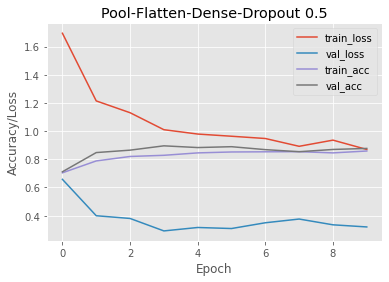

In [32]:
predict1 = model1.predict(testX, batch_size=32)
predict1 = np.argmax(predict1, axis=1)

print(classification_report(testY.argmax(axis=1), predict1))

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epochs), mymodel1.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), mymodel1.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, epochs), mymodel1.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epochs), mymodel1.history["val_accuracy"], label="val_acc")
plt.title("Pool-Flatten-Dense-Dropout 0.5")
plt.xlabel("Epoch")
plt.ylabel("Accuracy/Loss")
plt.legend(loc="upper right")
plt.show()

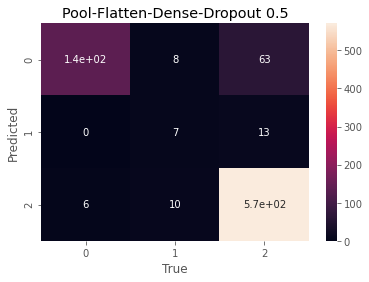

In [33]:
X_predict1 = np.argmax(model1.predict(testX), axis=1)
Y_predict1 = np.argmax(testY, axis=1)

sns.heatmap(confusion_matrix(X_predict1, Y_predict1), annot=True)
plt.ylabel('Predicted')
plt.xlabel('True')
plt.title("Pool-Flatten-Dense-Dropout 0.5")
plt.show()

### Pooling layer-Flatten-Dense256-Dropout 0.25

In [34]:
base2 = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

Head2 = base2.output
Head2 = AveragePooling2D(pool_size=(7, 7))(Head2)                                                                   
Head2 = Flatten(name="flatten")(Head2)                                                                              
Head2 = Dense(256, activation="relu")(Head2)
Head2 = Dropout(0.25)(Head2)

Head2 = Dense(3, activation="softmax")(Head2)

model2 = Model(inputs=base2.input, outputs=Head2)                

for layer in base2.layers:                                       
    layer.trainable = False
    
model2.compile(loss="categorical_crossentropy", optimizer=Adam(lr=lr,decay=lr/epochs),metrics=["accuracy"])

mymodel2 = model2.fit(
    gen.flow(trainX, trainY, batch_size=batch),
    steps_per_epoch=len(trainX) // batch,
    validation_data=(testX, testY),
    validation_steps=len(testX) // batch,
    epochs=epochs,
    class_weight = {0:5 , 1:10, 2:1}) 

Epoch 1/10
101/101 [==============================] - 50s 496ms/step - loss: 1.5251 - accuracy: 0.7206 - val_loss: 0.4027 - val_accuracy: 0.8319
Epoch 2/10
101/101 [==============================] - 48s 477ms/step - loss: 1.0398 - accuracy: 0.8040 - val_loss: 0.3426 - val_accuracy: 0.8601
Epoch 3/10
101/101 [==============================] - 50s 496ms/step - loss: 0.9802 - accuracy: 0.8248 - val_loss: 0.3990 - val_accuracy: 0.8479
Epoch 4/10
101/101 [==============================] - 49s 484ms/step - loss: 0.9082 - accuracy: 0.8447 - val_loss: 0.4543 - val_accuracy: 0.8209
Epoch 5/10
101/101 [==============================] - 48s 471ms/step - loss: 0.8135 - accuracy: 0.8614 - val_loss: 0.3534 - val_accuracy: 0.8736
Epoch 6/10
101/101 [==============================] - 48s 479ms/step - loss: 0.8028 - accuracy: 0.8602 - val_loss: 0.3455 - val_accuracy: 0.8675
Epoch 7/10
101/101 [==============================] - 52s 518ms/step - loss: 0.7549 - accuracy: 0.8682 - val_loss: 0.2790 - val_ac

              precision    recall  f1-score   support

           0       0.67      0.98      0.80       143
           1       0.33      0.36      0.35        25
           2       0.98      0.88      0.93       647

    accuracy                           0.88       815
   macro avg       0.66      0.74      0.69       815
weighted avg       0.91      0.88      0.89       815



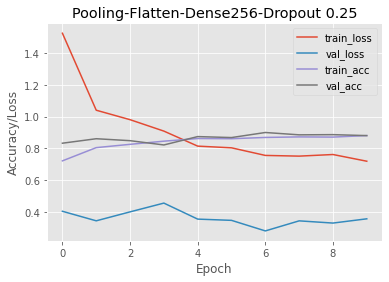

In [35]:
predict2 = model2.predict(testX, batch_size=32)
predict2 = np.argmax(predict2, axis=1)

print(classification_report(testY.argmax(axis=1), predict2))

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epochs), mymodel2.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), mymodel2.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, epochs), mymodel2.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epochs), mymodel2.history["val_accuracy"], label="val_acc")
plt.title("Pooling-Flatten-Dense256-Dropout 0.25")
plt.xlabel("Epoch")
plt.ylabel("Accuracy/Loss")
plt.legend(loc="upper right")
plt.show()

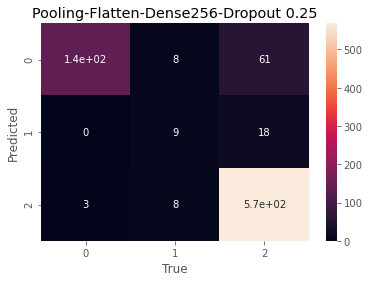

In [36]:
X_predict2 = np.argmax(model2.predict(testX), axis=1)
Y_predict2 = np.argmax(testY, axis=1)

sns.heatmap(confusion_matrix(X_predict2, Y_predict2), annot=True)
plt.ylabel('Predicted')
plt.xlabel('True')
plt.title("Pooling-Flatten-Dense256-Dropout 0.25")
plt.show()

# Pool-Flatten-Dense256-Dropout-Dense128-Dropout-Dense128-Dropout

In [37]:
base3 = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

Head3 = base3.output
Head3 = AveragePooling2D(pool_size=(7, 7))(Head3)                                                                   
Head3 = Flatten(name="flatten")(Head3)                                                                              
Head3 = Dense(256, activation="relu")(Head3)
Head3 = Dropout(0.25)(Head3)
Head3 = Dense(128, activation="relu")(Head3)
Head3 = Dropout(0.25)(Head3)
Head3 = Dense(128, activation="relu")(Head3)
Head3 = Dropout(0.25)(Head3)

Head3 = Dense(3, activation="softmax")(Head3)

model3 = Model(inputs=base3.input, outputs=Head3)                

for layer in base3.layers:                                       
    layer.trainable = False
    

model3.compile(loss="categorical_crossentropy", optimizer=Adam(lr=lr,decay=lr/epochs),metrics=["accuracy"])

mymodel3 = model3.fit(
    gen.flow(trainX, trainY, batch_size=batch),
    steps_per_epoch=len(trainX)//batch,
    validation_data=(testX, testY),
    validation_steps=len(testX)//batch,
    epochs=epochs,
    class_weight = {0:5 , 1:10, 2:1})     

Epoch 1/10
101/101 [==============================] - 50s 496ms/step - loss: 1.7034 - accuracy: 0.7011 - val_loss: 0.4917 - val_accuracy: 0.8000
Epoch 2/10
101/101 [==============================] - 49s 483ms/step - loss: 1.2503 - accuracy: 0.7777 - val_loss: 0.6007 - val_accuracy: 0.7423
Epoch 3/10
101/101 [==============================] - 49s 485ms/step - loss: 1.2025 - accuracy: 0.7944 - val_loss: 0.6312 - val_accuracy: 0.7423
Epoch 4/10
101/101 [==============================] - 49s 485ms/step - loss: 1.0821 - accuracy: 0.8109 - val_loss: 0.3258 - val_accuracy: 0.8810
Epoch 5/10
101/101 [==============================] - 49s 481ms/step - loss: 1.0287 - accuracy: 0.8307 - val_loss: 0.5096 - val_accuracy: 0.8074
Epoch 6/10
101/101 [==============================] - 49s 486ms/step - loss: 0.9899 - accuracy: 0.8326 - val_loss: 0.3768 - val_accuracy: 0.8736
Epoch 7/10
101/101 [==============================] - 49s 488ms/step - loss: 0.9201 - accuracy: 0.8555 - val_loss: 0.5512 - val_ac

              precision    recall  f1-score   support

           0       0.73      0.94      0.83       143
           1       0.30      0.24      0.27        25
           2       0.97      0.91      0.94       647

    accuracy                           0.90       815
   macro avg       0.67      0.70      0.68       815
weighted avg       0.90      0.90      0.90       815



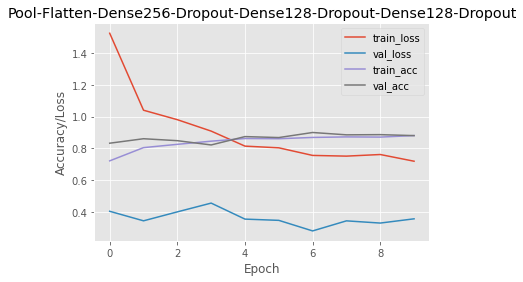

In [38]:
predict3 = model3.predict(testX, batch_size=32)
predict3 = np.argmax(predict3, axis=1)

print(classification_report(testY.argmax(axis=1), predict3))

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epochs), mymodel2.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), mymodel2.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, epochs), mymodel2.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epochs), mymodel2.history["val_accuracy"], label="val_acc")
plt.title("Pool-Flatten-Dense256-Dropout-Dense128-Dropout-Dense128-Dropout")
plt.xlabel("Epoch")
plt.ylabel("Accuracy/Loss")
plt.legend(loc="upper right")
plt.show()

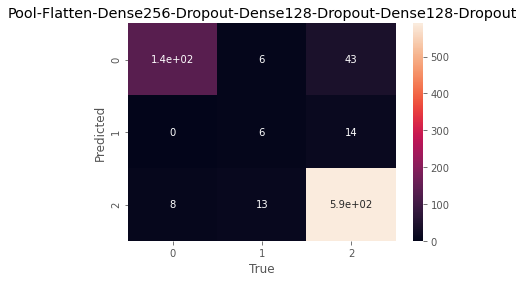

In [39]:
X_predict3 = np.argmax(model3.predict(testX), axis=1)
Y_predict3 = np.argmax(testY, axis=1)

sns.heatmap(confusion_matrix(X_predict3, Y_predict3), annot=True)
plt.ylabel('Predicted')
plt.xlabel('True')
plt.title("Pool-Flatten-Dense256-Dropout-Dense128-Dropout-Dense128-Dropout")
plt.show()

# Unfreezing layers

**By evaluating the results, the "Pooling-Flatten-Dense256-Dropout0.25" architecture is chosen, experiments will now be made with unfreezing some of the layers of MobileNetV2 and training them with the new data.**

In [41]:
base4 = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

Head4 = base4.output
Head4 = AveragePooling2D(pool_size=(7, 7))(Head4)                                                                   
Head4 = Flatten(name="flatten")(Head4)                                                                              
Head4 = Dense(256, activation="relu")(Head4)
Head4 = Dropout(0.25)(Head4)

Head4 = Dense(3, activation="softmax")(Head4)

model4 = Model(inputs=base4.input, outputs=Head4)                 

for layer in base4.layers[:-3]:                                   # Unfreezing 3 layers of the base model
    layer.trainable = False
    
model4.compile(loss="categorical_crossentropy", optimizer=Adam(lr=lr,decay=lr/epochs),metrics=["accuracy"])

mymodel4 = model4.fit(
    gen.flow(trainX, trainY, batch_size=batch),
    steps_per_epoch=len(trainX) // batch,
    validation_data=(testX, testY),
    validation_steps=len(testX) // batch,
    epochs=epochs,
    class_weight = {0:5 , 1:10, 2:1}) 

Epoch 1/10
101/101 [==============================] - 51s 509ms/step - loss: 1.3468 - accuracy: 0.7910 - val_loss: 0.3737 - val_accuracy: 0.9031
Epoch 2/10
101/101 [==============================] - 51s 502ms/step - loss: 1.0105 - accuracy: 0.8431 - val_loss: 0.2868 - val_accuracy: 0.9104
Epoch 3/10
101/101 [==============================] - 51s 504ms/step - loss: 0.8519 - accuracy: 0.8620 - val_loss: 0.3686 - val_accuracy: 0.8687
Epoch 4/10
101/101 [==============================] - 51s 505ms/step - loss: 0.7569 - accuracy: 0.8791 - val_loss: 0.2655 - val_accuracy: 0.9190
Epoch 5/10
101/101 [==============================] - 51s 508ms/step - loss: 0.7500 - accuracy: 0.8704 - val_loss: 0.3739 - val_accuracy: 0.8969
Epoch 6/10
101/101 [==============================] - 52s 513ms/step - loss: 0.6357 - accuracy: 0.8986 - val_loss: 0.4553 - val_accuracy: 0.8515
Epoch 7/10
101/101 [==============================] - 51s 505ms/step - loss: 0.5923 - accuracy: 0.8918 - val_loss: 0.3465 - val_ac

              precision    recall  f1-score   support

           0       0.89      0.80      0.85       143
           1       0.25      0.48      0.33        25
           2       0.96      0.95      0.95       647

    accuracy                           0.91       815
   macro avg       0.70      0.74      0.71       815
weighted avg       0.93      0.91      0.91       815



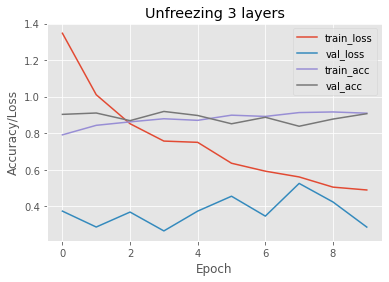

In [42]:
predict4 = model4.predict(testX, batch_size=32)
predict4 = np.argmax(predict4, axis=1)

print(classification_report(testY.argmax(axis=1), predict4))

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epochs), mymodel4.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), mymodel4.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, epochs), mymodel4.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epochs), mymodel4.history["val_accuracy"], label="val_acc")
plt.title("Unfreezing 3 layers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy/Loss")
plt.legend(loc="upper right")
plt.show()

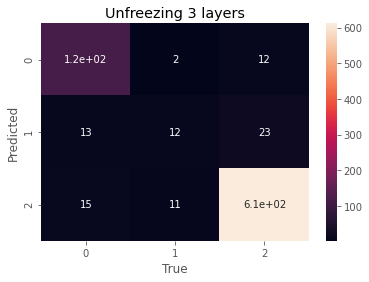

In [43]:
X_predict4 = np.argmax(model4.predict(testX), axis=1)
Y_predict4 = np.argmax(testY, axis=1)

sns.heatmap(confusion_matrix(X_predict4, Y_predict4), annot=True)
plt.ylabel('Predicted')
plt.xlabel('True')
plt.title("Unfreezing 3 layers")
plt.show()

**Unfreezing 8 layers.**

In [45]:
base5 = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

Head5 = base5.output
Head5 = AveragePooling2D(pool_size=(7, 7))(Head5)                                                                   
Head5 = Flatten(name="flatten")(Head5)                                                                              
Head5 = Dense(256, activation="relu")(Head5)
Head5 = Dropout(0.25)(Head5)

Head5 = Dense(3, activation="softmax")(Head5)

model5 = Model(inputs=base5.input, outputs=Head5)                 

for layer in base5.layers[:-8]:                                   # Unfreezing 8 layers of the base model
    layer.trainable = False
    
model5.compile(loss="categorical_crossentropy", optimizer=Adam(lr=lr,decay=lr/epochs),metrics=["accuracy"])

mymodel5 = model5.fit(
    gen.flow(trainX, trainY, batch_size=batch),
    steps_per_epoch=len(trainX) // batch,
    validation_data=(testX, testY),
    validation_steps=len(testX) // batch,
    epochs=epochs,
    class_weight = {0:5 , 1:10, 2:1}) 

Epoch 1/10
101/101 [==============================] - 54s 537ms/step - loss: 1.4679 - accuracy: 0.7891 - val_loss: 2.9084 - val_accuracy: 0.7975
Epoch 2/10
101/101 [==============================] - 56s 552ms/step - loss: 1.0891 - accuracy: 0.8208 - val_loss: 2.9068 - val_accuracy: 0.8012
Epoch 3/10
101/101 [==============================] - 54s 538ms/step - loss: 0.9823 - accuracy: 0.8279 - val_loss: 3.4055 - val_accuracy: 0.7939
Epoch 4/10
101/101 [==============================] - 56s 552ms/step - loss: 0.7969 - accuracy: 0.8738 - val_loss: 4.5562 - val_accuracy: 0.7939
Epoch 5/10
101/101 [==============================] - 55s 546ms/step - loss: 0.7763 - accuracy: 0.8676 - val_loss: 3.3635 - val_accuracy: 0.7951
Epoch 6/10
101/101 [==============================] - 56s 557ms/step - loss: 0.7417 - accuracy: 0.8828 - val_loss: 3.3076 - val_accuracy: 0.7939
Epoch 7/10
101/101 [==============================] - 55s 549ms/step - loss: 0.6828 - accuracy: 0.8952 - val_loss: 3.2245 - val_ac

              precision    recall  f1-score   support

           0       1.00      0.03      0.05       143
           1       1.00      0.08      0.15        25
           2       0.80      1.00      0.89       647

    accuracy                           0.80       815
   macro avg       0.93      0.37      0.36       815
weighted avg       0.84      0.80      0.72       815



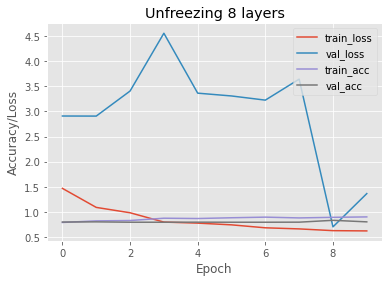

In [46]:
predict5 = model5.predict(testX, batch_size=32)
predict5 = np.argmax(predict5, axis=1)

print(classification_report(testY.argmax(axis=1), predict5))

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epochs), mymodel5.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), mymodel5.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, epochs), mymodel5.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epochs), mymodel5.history["val_accuracy"], label="val_acc")
plt.title("Unfreezing 8 layers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy/Loss")
plt.legend(loc="upper right")
plt.show()

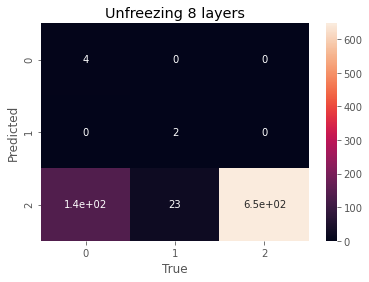

In [47]:
X_predict5 = np.argmax(model5.predict(testX), axis=1)
Y_predict5 = np.argmax(testY, axis=1)

sns.heatmap(confusion_matrix(X_predict5, Y_predict5), annot=True)
plt.ylabel('Predicted')
plt.xlabel('True')
plt.title("Unfreezing 8 layers")
plt.show()

# Learning rate

**As observed, unfreezing 3 layers can enhance the results. Bearing this in mind, adaptations to the learning rate will now be made in order to find the optimal value. Until now, the learning rate was 0.001.**

In [48]:
lr1=1e-2
lr2=1e-4  

In [49]:
base6 = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

Head6 = base6.output
Head6 = AveragePooling2D(pool_size=(7, 7))(Head6)                                                                   
Head6 = Flatten(name="flatten")(Head6)                                                                              
Head6 = Dense(256, activation="relu")(Head6)
Head6 = Dropout(0.25)(Head6)

Head6 = Dense(3, activation="softmax")(Head6)

model6 = Model(inputs=base6.input, outputs=Head6)                

for layer in base6.layers[:-3]:                                   
    layer.trainable = False
    
model6.compile(loss="categorical_crossentropy", optimizer=Adam(lr1,decay=lr1/epochs),metrics=["accuracy"])

mymodel6 = model6.fit(
    gen.flow(trainX, trainY, batch_size=batch),
    steps_per_epoch=len(trainX) // batch,
    validation_data=(testX, testY),
    validation_steps=len(testX) // batch,
    epochs=epochs,
    class_weight = {0:5 , 1:10, 2:1}) 

Epoch 1/10
101/101 [==============================] - 51s 508ms/step - loss: 2.6803 - accuracy: 0.7448 - val_loss: 1.1049 - val_accuracy: 0.8528
Epoch 2/10
101/101 [==============================] - 51s 505ms/step - loss: 1.1946 - accuracy: 0.8155 - val_loss: 1.4472 - val_accuracy: 0.8380
Epoch 3/10
101/101 [==============================] - 52s 519ms/step - loss: 1.0517 - accuracy: 0.8279 - val_loss: 0.8471 - val_accuracy: 0.8626
Epoch 4/10
101/101 [==============================] - 51s 507ms/step - loss: 0.8959 - accuracy: 0.8598 - val_loss: 0.7721 - val_accuracy: 0.8736
Epoch 5/10
101/101 [==============================] - 51s 506ms/step - loss: 0.8243 - accuracy: 0.8614 - val_loss: 0.5627 - val_accuracy: 0.8810
Epoch 6/10
101/101 [==============================] - 51s 509ms/step - loss: 0.7679 - accuracy: 0.8738 - val_loss: 0.6063 - val_accuracy: 0.9006
Epoch 7/10
101/101 [==============================] - 51s 506ms/step - loss: 0.7051 - accuracy: 0.8822 - val_loss: 0.4690 - val_ac

              precision    recall  f1-score   support

           0       0.90      0.78      0.83       143
           1       0.29      0.36      0.32        25
           2       0.94      0.96      0.95       647

    accuracy                           0.91       815
   macro avg       0.71      0.70      0.70       815
weighted avg       0.91      0.91      0.91       815



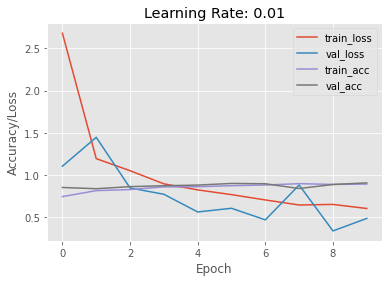

In [50]:
predict6 = model6.predict(testX, batch_size=32)
predict6 = np.argmax(predict6, axis=1)

print(classification_report(testY.argmax(axis=1), predict6))

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epochs), mymodel6.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), mymodel6.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, epochs), mymodel6.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epochs), mymodel6.history["val_accuracy"], label="val_acc")
plt.title("Learning Rate: 0.01")
plt.xlabel("Epoch")
plt.ylabel("Accuracy/Loss")
plt.legend(loc="upper right")
plt.show()

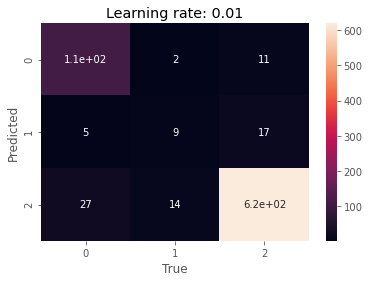

In [51]:
X_predict6 = np.argmax(model6.predict(testX), axis=1)
Y_predict6 = np.argmax(testY, axis=1)

sns.heatmap(confusion_matrix(X_predict6, Y_predict6), annot=True)
plt.ylabel('Predicted')
plt.xlabel('True')
plt.title("Learning rate: 0.01")
plt.show()

In [52]:
base7 = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

Head7 = base7.output
Head7 = AveragePooling2D(pool_size=(7, 7))(Head7)                                                                   
Head7 = Flatten(name="flatten")(Head7)                                                                              
Head7 = Dense(256, activation="relu")(Head7)
Head7 = Dropout(0.25)(Head7)

Head7 = Dense(3, activation="softmax")(Head7)

model7 = Model(inputs=base7.input, outputs=Head7)                 

for layer in base7.layers[:-3]:                                   
    layer.trainable = False
    
model7.compile(loss="categorical_crossentropy", optimizer=Adam(lr2,decay=lr2/epochs),metrics=["accuracy"])

mymodel7 = model7.fit(
    gen.flow(trainX, trainY, batch_size=batch),
    steps_per_epoch=len(trainX) // batch,
    validation_data=(testX, testY),
    validation_steps=len(testX) // batch,
    epochs=epochs,
    class_weight = {0:5 , 1:10, 2:1}) 

Epoch 1/10
101/101 [==============================] - 51s 509ms/step - loss: 1.4659 - accuracy: 0.7184 - val_loss: 0.3523 - val_accuracy: 0.8675
Epoch 2/10
101/101 [==============================] - 52s 511ms/step - loss: 1.0332 - accuracy: 0.8214 - val_loss: 0.2656 - val_accuracy: 0.9006
Epoch 3/10
101/101 [==============================] - 52s 511ms/step - loss: 0.8750 - accuracy: 0.8518 - val_loss: 0.2437 - val_accuracy: 0.9092
Epoch 4/10
101/101 [==============================] - 51s 505ms/step - loss: 0.8048 - accuracy: 0.8744 - val_loss: 0.2596 - val_accuracy: 0.8982
Epoch 5/10
101/101 [==============================] - 51s 502ms/step - loss: 0.6906 - accuracy: 0.8825 - val_loss: 0.2674 - val_accuracy: 0.9031
Epoch 6/10
101/101 [==============================] - 51s 500ms/step - loss: 0.6776 - accuracy: 0.8840 - val_loss: 0.2760 - val_accuracy: 0.9043
Epoch 7/10
101/101 [==============================] - 51s 501ms/step - loss: 0.6306 - accuracy: 0.8868 - val_loss: 0.2319 - val_ac

              precision    recall  f1-score   support

           0       0.88      0.85      0.87       143
           1       0.20      0.56      0.29        25
           2       0.97      0.91      0.94       647

    accuracy                           0.89       815
   macro avg       0.68      0.77      0.70       815
weighted avg       0.93      0.89      0.91       815



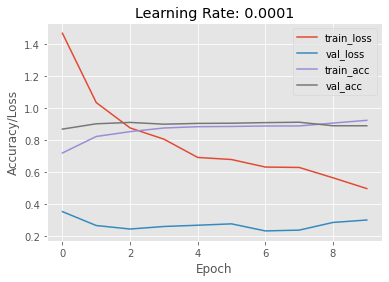

In [53]:
predict7 = model7.predict(testX, batch_size=32)
predict7 = np.argmax(predict7, axis=1)

print(classification_report(testY.argmax(axis=1), predict7))

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epochs), mymodel7.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), mymodel7.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, epochs), mymodel7.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epochs), mymodel7.history["val_accuracy"], label="val_acc")
plt.title("Learning Rate: 0.0001")
plt.xlabel("Epoch")
plt.ylabel("Accuracy/Loss")
plt.legend(loc="upper right")
plt.show()

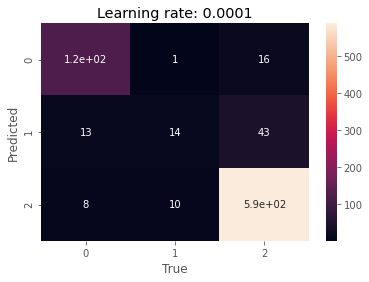

In [54]:
X_predict7 = np.argmax(model7.predict(testX), axis=1)
Y_predict7 = np.argmax(testY, axis=1)

sns.heatmap(confusion_matrix(X_predict7, Y_predict7), annot=True)
plt.ylabel('Predicted')
plt.xlabel('True')
plt.title("Learning rate: 0.0001")
plt.show()

**It can be seen that the initially chosen learning rate of 0.001 has the best results. The model will now be trained for a bigger number of epochs to evaluate the results.**

In [22]:
epochs=20

In [23]:
base8 = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

Head8 = base8.output
Head8 = AveragePooling2D(pool_size=(7, 7))(Head8)                                                                   
Head8 = Flatten(name="flatten")(Head8)                                                                              
Head8 = Dense(256, activation="relu")(Head8)
Head8 = Dropout(0.25)(Head8)

Head8 = Dense(3, activation="softmax")(Head8)

model8 = Model(inputs=base8.input, outputs=Head8)                 

for layer in base8.layers[:-3]:                                  
    layer.trainable = False
    
model8.compile(loss="categorical_crossentropy", optimizer=Adam(lr=lr,decay=lr/epochs),metrics=["accuracy"])

mymodel8 = model8.fit(
    gen.flow(trainX, trainY, batch_size=batch),
    steps_per_epoch=len(trainX) // batch,
    validation_data=(testX, testY),
    validation_steps=len(testX) // batch,
    epochs=epochs,
    class_weight = {0:5 , 1:10, 2:1}) 

Epoch 1/20
101/101 [==============================] - 54s 533ms/step - loss: 1.4720 - accuracy: 0.7606 - val_loss: 0.3648 - val_accuracy: 0.8589
Epoch 2/20
101/101 [==============================] - 53s 527ms/step - loss: 0.9564 - accuracy: 0.8412 - val_loss: 0.3870 - val_accuracy: 0.8822
Epoch 3/20
101/101 [==============================] - 52s 513ms/step - loss: 0.8259 - accuracy: 0.8614 - val_loss: 0.2745 - val_accuracy: 0.9031
Epoch 4/20
101/101 [==============================] - 51s 500ms/step - loss: 0.7762 - accuracy: 0.8660 - val_loss: 0.2905 - val_accuracy: 0.9190
Epoch 5/20
101/101 [==============================] - 50s 496ms/step - loss: 0.6009 - accuracy: 0.8812 - val_loss: 0.5845 - val_accuracy: 0.8736
Epoch 6/20
101/101 [==============================] - 54s 531ms/step - loss: 0.6150 - accuracy: 0.8881 - val_loss: 0.3542 - val_accuracy: 0.8847
Epoch 7/20
101/101 [==============================] - 50s 498ms/step - loss: 0.6118 - accuracy: 0.8930 - val_loss: 0.3789 - val_ac

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       143
           1       0.50      0.44      0.47        25
           2       0.97      0.96      0.97       647

    accuracy                           0.94       815
   macro avg       0.78      0.77      0.77       815
weighted avg       0.94      0.94      0.94       815



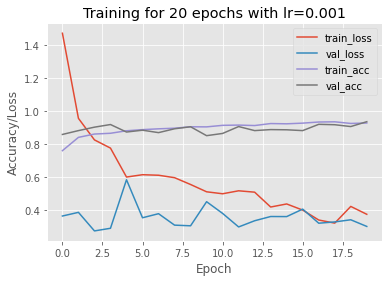

In [24]:
predict8 = model8.predict(testX, batch_size=32)
predict8 = np.argmax(predict8, axis=1)

print(classification_report(testY.argmax(axis=1), predict8))

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epochs), mymodel8.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), mymodel8.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, epochs), mymodel8.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epochs), mymodel8.history["val_accuracy"], label="val_acc")
plt.xlabel("Epoch")
plt.ylabel("Accuracy/Loss")
plt.legend(loc="upper right")
plt.title("Training for 20 epochs with lr=0.001")
plt.show()

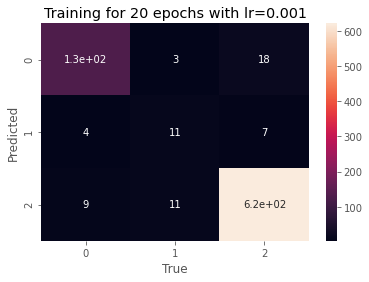

In [25]:
X_predict8 = np.argmax(model8.predict(testX), axis=1)
Y_predict8 = np.argmax(testY, axis=1)

sns.heatmap(confusion_matrix(X_predict8, Y_predict8), annot=True)
plt.ylabel('Predicted')
plt.xlabel('True')
plt.title("Training for 20 epochs with lr=0.001")
plt.show()

**Training the model with learning rate of 0.0001 for 20 epochs to test if we can get optimal results.**

In [20]:
base9 = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

Head9 = base9.output
Head9 = AveragePooling2D(pool_size=(7, 7))(Head9)                                                                   
Head9 = Flatten(name="flatten")(Head9)                                                                              
Head9 = Dense(256, activation="relu")(Head9)
Head9 = Dropout(0.25)(Head9)

Head9 = Dense(3, activation="softmax")(Head9)

model9 = Model(inputs=base9.input, outputs=Head9)                 

for layer in base9.layers[:-3]:                                   
    layer.trainable = False
    
model9.compile(loss="categorical_crossentropy", optimizer=Adam(lr2,lr2/epochs),metrics=["accuracy"])

mymodel9 = model9.fit(
    gen.flow(trainX, trainY, batch_size=batch),
    steps_per_epoch=len(trainX) // batch,
    validation_data=(testX, testY),
    validation_steps=len(testX) // batch,
    epochs=epochs,
    class_weight = {0:5 , 1:10, 2:1}) 

Epoch 1/20
101/101 [==============================] - 47s 464ms/step - loss: 1.4359 - accuracy: 0.7082 - val_loss: 0.3524 - val_accuracy: 0.8859
Epoch 2/20
101/101 [==============================] - 46s 458ms/step - loss: 1.0209 - accuracy: 0.8140 - val_loss: 0.3009 - val_accuracy: 0.8883
Epoch 3/20
101/101 [==============================] - 47s 467ms/step - loss: 0.8521 - accuracy: 0.8521 - val_loss: 0.2435 - val_accuracy: 0.9117
Epoch 4/20
101/101 [==============================] - 47s 464ms/step - loss: 0.7726 - accuracy: 0.8701 - val_loss: 0.2515 - val_accuracy: 0.9055
Epoch 5/20
101/101 [==============================] - 47s 470ms/step - loss: 0.7111 - accuracy: 0.8735 - val_loss: 0.2341 - val_accuracy: 0.9141
Epoch 6/20
101/101 [==============================] - 46s 457ms/step - loss: 0.6693 - accuracy: 0.8847 - val_loss: 0.2730 - val_accuracy: 0.8920
Epoch 7/20
101/101 [==============================] - 46s 454ms/step - loss: 0.6809 - accuracy: 0.8887 - val_loss: 0.2841 - val_ac

              precision    recall  f1-score   support

           0       0.86      0.87      0.86       143
           1       0.39      0.52      0.45        25
           2       0.96      0.95      0.96       647

    accuracy                           0.92       815
   macro avg       0.74      0.78      0.76       815
weighted avg       0.93      0.92      0.92       815



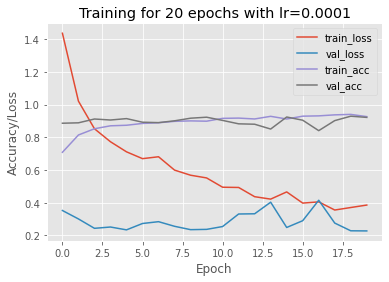

In [21]:
predict9 = model9.predict(testX, batch_size=32)
predict9 = np.argmax(predict9, axis=1)

print(classification_report(testY.argmax(axis=1), predict9))

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epochs), mymodel9.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), mymodel9.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, epochs), mymodel9.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epochs), mymodel9.history["val_accuracy"], label="val_acc")
plt.xlabel("Epoch")
plt.ylabel("Accuracy/Loss")
plt.legend(loc="upper right")
plt.title("Training for 20 epochs with lr=0.0001")
plt.show()

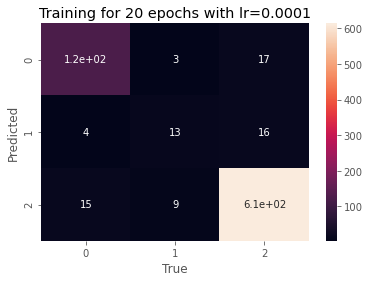

In [22]:
X_predict9 = np.argmax(model9.predict(testX), axis=1)
Y_predict9 = np.argmax(testY, axis=1)

sns.heatmap(confusion_matrix(X_predict9, Y_predict9), annot=True)
plt.ylabel('Predicted')
plt.xlabel('True')
plt.title("Training for 20 epochs with lr=0.0001")
plt.show()

**Finally, if training for another 10 epochs will get better results will be tested.**

In [26]:
epochs=30
base8 = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

Head8 = base8.output
Head8 = AveragePooling2D(pool_size=(7, 7))(Head8)                                                                   
Head8 = Flatten(name="flatten")(Head8)                                                                              
Head8 = Dense(256, activation="relu")(Head8)
Head8 = Dropout(0.25)(Head8)

Head8 = Dense(3, activation="softmax")(Head8)

model8 = Model(inputs=base8.input, outputs=Head8)                 

for layer in base8.layers[:-3]:                                   
    layer.trainable = False
    
model8.compile(loss="categorical_crossentropy", optimizer=Adam(lr=lr,decay=lr/epochs),metrics=["accuracy"])

mymodel8 = model8.fit(
    gen.flow(trainX, trainY, batch_size=batch),
    steps_per_epoch=len(trainX) // batch,
    validation_data=(testX, testY),
    validation_steps=len(testX) // batch,
    epochs=epochs,
    class_weight = {0:5 , 1:10, 2:1}) 

Epoch 1/30
101/101 [==============================] - 54s 536ms/step - loss: 1.4766 - accuracy: 0.7631 - val_loss: 0.4052 - val_accuracy: 0.8724
Epoch 2/30
101/101 [==============================] - 53s 529ms/step - loss: 1.0206 - accuracy: 0.8434 - val_loss: 0.2868 - val_accuracy: 0.8957
Epoch 3/30
101/101 [==============================] - 53s 525ms/step - loss: 0.8573 - accuracy: 0.8651 - val_loss: 0.3158 - val_accuracy: 0.8834
Epoch 4/30
101/101 [==============================] - 53s 524ms/step - loss: 0.7864 - accuracy: 0.8623 - val_loss: 0.2612 - val_accuracy: 0.9129
Epoch 5/30
101/101 [==============================] - 52s 519ms/step - loss: 0.7402 - accuracy: 0.8816 - val_loss: 0.3436 - val_accuracy: 0.8933
Epoch 6/30
101/101 [==============================] - 52s 512ms/step - loss: 0.5836 - accuracy: 0.8834 - val_loss: 0.2953 - val_accuracy: 0.9031
Epoch 7/30
101/101 [==============================] - 52s 516ms/step - loss: 0.5900 - accuracy: 0.8977 - val_loss: 0.5749 - val_ac

              precision    recall  f1-score   support

           0       0.79      0.94      0.86       143
           1       0.36      0.36      0.36        25
           2       0.97      0.93      0.95       647

    accuracy                           0.92       815
   macro avg       0.71      0.74      0.72       815
weighted avg       0.92      0.92      0.92       815



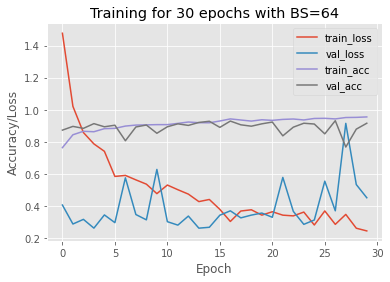

In [27]:
predict8 = model8.predict(testX, batch_size=64)
predict8 = np.argmax(predict8, axis=1)

print(classification_report(testY.argmax(axis=1), predict8))

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epochs), mymodel8.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), mymodel8.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, epochs), mymodel8.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epochs), mymodel8.history["val_accuracy"], label="val_acc")
plt.xlabel("Epoch")
plt.ylabel("Accuracy/Loss")
plt.legend(loc="upper right")
plt.title("Training for 30 epochs with BS=64")
plt.show()

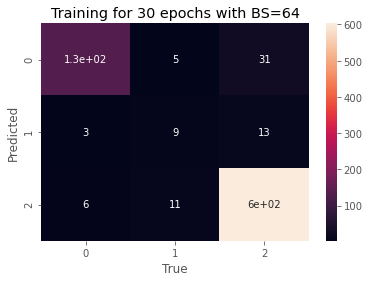

In [28]:
X_predict8 = np.argmax(model8.predict(testX), axis=1)
Y_predict8 = np.argmax(testY, axis=1)

sns.heatmap(confusion_matrix(X_predict8, Y_predict8), annot=True)
plt.ylabel('Predicted')
plt.xlabel('True')
plt.title("Training for 30 epochs with BS=64")
plt.show()